# Лабораторная работа 1. Pandas, метод ближайших соседей и решающие деревья.

ФИО: Иванов Сергей Максимович

Группа: 317

In [1]:
import numpy as np
import pandas as pd
import sklearn.neighbors
import sklearn.ensemble as ensemble
from sklearn import tree
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Часть 1: Pandas

#### Ответьте на вопросы о данных по авиарейсам в США за 2008 год.

Данные: http://stat-computing.org/dataexpo/2009/2008.csv.bz2
(обратите внимание, что распаковывать этот файл не обязательно — функция `pandas.read_csv` умеет читать из архивов автоматически)

Описание: http://stat-computing.org/dataexpo/2009/the-data.html

1. Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)
2. Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.
3. Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?
4. Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?
5. Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?
6. Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [47]:
DF = pd.read_csv("2008.csv.bz2")
DF.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


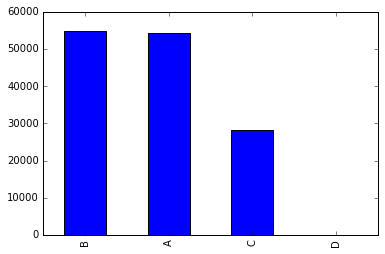

In [48]:
CC = DF['CancellationCode']
CC.value_counts().plot(kind='bar')

Ответ 1: weather

In [49]:
print("Ответ 2:")
print("Max: ", DF.Distance.max())
print("Min: ", DF.Distance.min())
print("Mean: ", DF.Distance.mean())

Ответ 2:
Max:  4962
Min:  11
Mean:  726.3870294253928


In [50]:
DF[DF.Distance == DF.Distance.min()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2547298,2008,5,15,4,2037.0,1800,2125.0,1900,OH,4988,...,10.0,7.0,0,NaN,0,145.0,0.0,0.0,0.0,0.0
4392215,2008,8,10,7,1315.0,1220,1415.0,1320,OH,5572,...,8.0,38.0,0,NaN,0,55.0,0.0,0.0,0.0,0.0


In [51]:
DF[DF.FlightNum == 4988]['Distance'].values

array([834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834,  96, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,
       834, 834, 834, 834, 834, 834, 834, 834, 834, 834, 834,  11, 834,
       834, 834, 414, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
       223, 712, 712, 712, 712, 321, 321, 321, 321, 321, 321, 321, 321,
       321, 321, 321, 321, 321, 321, 321, 321, 321, 321, 903, 903, 903,
       903, 903, 903, 903, 903, 903, 903, 903, 903, 903, 903, 90

In [52]:
DF[DF.FlightNum == 5572]['Distance'].values

array([544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544,
       544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544,
       544, 544, 544, 544, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544,
       544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544,
       544, 544, 544, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329, 329,
       329, 329, 329, 329, 329, 544, 544, 544, 544, 544, 544, 544, 544,
       544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 544, 54

Ответ 3. Не выглядит, [бывают рейсы и короче.](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%B0%D0%B4%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%B0%D0%B2%D0%B8%D0%B0%D1%80%D0%B5%D0%B9%D1%81%D1%8B#.D0.A1.D0.B0.D0.BC.D1.8B.D0.B5_.D0.BA.D0.BE.D1.80.D0.BE.D1.82.D0.BA.D0.B8.D0.B5_.D1.80.D0.B5.D0.B9.D1.81.D1.8B) Таких рейсов было два, 15 мая и 10 августа 2008-го года, рейсы 4988 и 5572.

Рейс №4988 в другие дни пролетает обычно 834 или 903 мили, но встречаются и другие значения.
Рейс №5572 в другие дни пролетает обычно 544, 329 или 134 мили, тоже встречаются и другие значения.

In [21]:
DF["Origin"].value_counts().index[0]

'ATL'

Ответ 4. Больше всего вылетов из аэропорта с сокращением ATL, как подсказывает airports.csv, расшифровывается это как "William B Hartsfield-Atlanta Intl", а аэропорт находится в Атланте (Atlanta, USA).

In [22]:
print("Ответ 5:")
DF.groupby("Origin")['AirTime'].mean()

Ответ 5:


Origin
ABE     90.965040
ABI     36.690141
ABQ     91.471470
ABY     34.963415
ACT     30.539860
ACV     53.636610
ACY    108.848214
ADK    149.193548
ADQ     41.964286
AEX     70.034704
AGS     39.355207
AKN     18.500000
ALB    105.005062
ALO     36.679487
AMA     56.313119
ANC    136.479326
ASE     57.575113
ATL     94.947786
ATW     57.029063
AUS     97.524117
AVL     73.666667
AVP     99.535475
AZO     36.399687
BDL    122.260353
BET     56.849398
BFL     64.265053
BGM     67.872247
BGR    105.571965
BHM     84.092114
BIL     70.626725
          ...    
SPI     47.264000
SPS     30.099346
SRQ    109.142414
STL    100.017373
STT    168.322909
STX    177.161491
SUN     47.930337
SUX     45.840000
SWF    140.552967
SYR     85.121257
TEX     92.679389
TLH     65.688283
TOL     56.487666
TPA    120.292551
TRI     48.850153
TUL     83.150345
TUP     42.900000
TUS     95.136052
TVC     47.696909
TWF     42.013774
TXK     47.098734
TYR     31.688380
TYS     83.134138
VLD     45.033233
VPS

In [24]:
print("Max mean air time: ", DF.groupby("Origin")['AirTime'].mean().argmax())

Max mean air time:  SJU


По этому показателю лидирует аэропорт Luis Munoz Marin International, город San Juan (USA).

Примечание. Использование функции filter жрало непомерно много памяти, поэтому решил задачу 6 хитрее.

In [8]:
DFGB = DF.groupby("Origin")['DepDelay']
DFGB_Filtered = DF[DF.DepDelay > 0].groupby("Origin")['DepDelay']
(DFGB_Filtered.count() / DFGB.count() * (DFGB.count() >= 1000)).argmax()

'DAL'

Ответ 6: Dallas Love, из города Dallas (USA)

## Часть 2: метрические методы и категориальные признаки

Все дальнейшие эксперименты предлагается проводить на данных соревнования Amazon Employee Access Challenge: https://www.kaggle.com/c/amazon-employee-access-challenge

В данной задаче предлагается предсказать, будет ли одобрен запрос сотрудника на получение доступа к тому или иному ресурсу. Все признаки являются категориальными.

Для удобства данные можно загрузить по ссылке: https://www.dropbox.com/s/q6fbs1vvhd5kvek/amazon.csv

Сразу прочитаем данные и создадим разбиение на обучение и контроль:

In [2]:
data = pd.read_csv('amazon.csv')
data.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [3]:
data.shape

(32769, 10)

In [4]:
# доля положительных примеров
data.ACTION.mean()

0.9421099209618847

In [5]:
# число значений у признаков
for col_name in data.columns:
    print(col_name, len(data[col_name].unique()))

ACTION 2
RESOURCE 7518
MGR_ID 4243
ROLE_ROLLUP_1 128
ROLE_ROLLUP_2 177
ROLE_DEPTNAME 449
ROLE_TITLE 343
ROLE_FAMILY_DESC 2358
ROLE_FAMILY 67
ROLE_CODE 343


In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0],
                                                    test_size=0.3, random_state=179)

In [7]:
# настроим сразу матплот
plt.rcParams['figure.figsize'] = 12, 12

#### 1. Реализуйте три функции расстояния на категориальных признаках, которые обсуждались на втором семинаре.

Проще всего будет определить метрики как [user-defined distance](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html), после чего воспользоваться реализацией kNN из sklearn (в этом случае используйте функцию predict_proba). Можно реализовать метод k ближайших соседей и самостоятально — в этом случае учитите, что он должен возвращать оценку вероятности, то есть отношение объектов первого класса среди соседей к числу соседей).

Постарайтесь уделить особое внимание эффективности кода — при реализации метрик "в лоб" вы можете столкнуться с очень большим временем выполнения.

In [8]:
Hash_sid = np.empty((9), dtype=dict)
Hash_id = np.empty((9), dtype=dict)
L = len(X_train)
for i, feature in enumerate(X_train.columns):
    Hash_sid[i] = {}
    Hash_id[i] = {}
    
    F = X_train[feature].value_counts()
    feature_values = X_train[feature].unique()
    for x in feature_values:
        Hash_sid[i][x] = F[x] * (F[x] - 1) / (L * (L - 1))
        Hash_id[i][x] = math.log(F[x] + 1)

In [9]:
def indicator_dist(x, y):
    return (x != y).sum()

def smoothy_indicator_dist(x, y):
    return np.array([(x[c] != y[c]) + (x[c] == y[c]) * Hash_sid[c].get(x[c], 0) for c in range(9)]).sum()

def importance_dist(x, y):
    return np.array([(x[c] != y[c]) * Hash_id[c].get(x[c], 0) * Hash_id[c].get(y[c], 0) for c in range(9)]).sum()

#### Подсчитайте для каждой из метрик качество на тестовой выборке `X_test` при числе соседей $k = 10$. Мера качества — AUC-ROC.

#### Какая функция расстояния оказалась лучшей?

In [11]:
%%time
Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10, algorithm="brute", metric=indicator_dist).fit(X_train, y_train)
print(sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(X_test)[:, 1]))

0.797718392108
Wall time: 11min 58s


In [11]:
%%time
Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10, algorithm="brute", metric=smoothy_indicator_dist).fit(X_train, y_train)
print(sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(X_test)[:, 1]))

0.627034959576
Wall time: 2h 38min 2s


In [12]:
%%time
Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10, algorithm="brute", metric=importance_dist).fit(X_train, y_train)
print(sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(X_test)[:, 1]))

0.786967073972
Wall time: 3h 10min 26s


Непонятно, чем это так вторая метрика провисла, она вроде должна быть очень сильно похожа на первую. Тем не менее, хочется сделать вывод "не надо излишне мудрить!", хотя из ROLE_ROLLUP_1 можно, казалось бы, такими методами выкачивать информацию, например, зная, что многие имеют значение 117961 (то есть теоретически эти методы тут применимы).  

#### 2 (бонус). Подберите лучшее (на тестовой выборке) число соседей $k$ для каждой из функций расстояния. Какое наилучшее качество удалось получить?

Для подбора можно использовать любые средства из sklearn.

В sklearn нет суперкомпьютеров.

#### 3. Реализуйте счетчики (http://blogs.technet.com/b/machinelearning/archive/2015/02/17/big-learning-made-easy-with-counts.aspx), которые заменят категориальные признаки на вещественные.

А именно, каждый категориальный признак нужно заменить на три: 
1. Число `counts` объектов в обучающей выборке с таким же значением признака.
2. Число `successes` объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака.
3. Сглаженное отношение двух предыдущих величин: (`successes` + 1) / (`counts` + 2).

In [15]:
def MakeCounters(train, extractable_data, extractable_data_ans):
    train_modified = pd.DataFrame(index=train.index)
    
    for feature in train.columns:
        vc = extractable_data[feature].value_counts()
        vc_t = (extractable_data[feature] * extractable_data_ans).value_counts()
        
        train_modified[feature + "_counts"] = pd.Series([vc.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_successes"] = pd.Series([vc_t.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_cs"] = (train_modified[feature + "_successes"] + 1) / (train_modified[feature + "_counts"] + 2)
        
    return train_modified

Поскольку признаки, содержащие информацию о целевой переменной, могут привести к переобучению, может оказаться полезным сделать *фолдинг*: разбить обучающую выборку на $n$ частей, и для $i$-й части считать `counts` и `successes` по всем остальным частям. Для тестовой выборки используются счетчики, посчитанные по всей обучающей выборке. Реализуйте и такой вариант. Можно использовать $n = 3$.

#### Посчитайте на тесте AUC-ROC метода $k$ ближайших соседей с евклидовой метрикой для выборки, где категориальные признаки заменены на счетчики. Сравните по AUC-ROC два варианта формирования выборки — с фолдингом и без. Не забудьте подобрать наилучшее число соседей $k$.

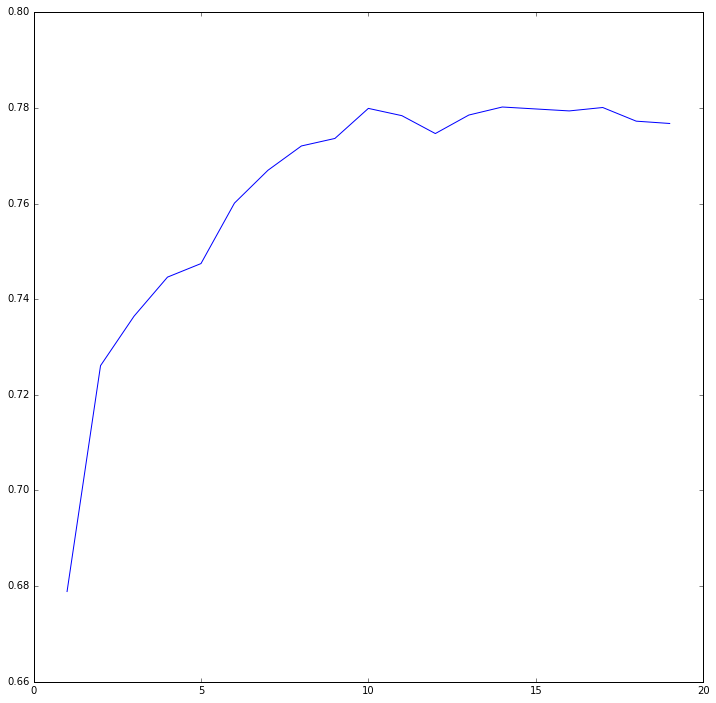

BEST k:  14
BEST AUC-ROC:  0.780177400807


In [228]:
mod_train = MakeCounters(X_train, X_train, y_train)
mod_test = MakeCounters(X_test, X_train, y_train)

k_list = np.arange(1, 20)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree").fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])
    
plt.plot(k_list, auc_roc)
plt.show()

print("BEST k: ", k_list[np.argmax(auc_roc)])
print("BEST AUC-ROC: ", np.max(auc_roc))

In [229]:
def MakeCountersWithFolding(X_train, y_train):
    # поскольку в задании n фиксированно равен 3, мне было лень писать фолдинг в общем случае
    L = len(X_train)
    mt1 = MakeCounters(X_train[:L//3], X_train[L//3:], y_train[L//3:])
    indexes = np.append(np.arange(0, L//3), np.arange(2*L//3, L))
    mt2 = MakeCounters(X_train[L//3:2*L//3], X_train.iloc[indexes], y_train.iloc[indexes])
    mt3 = MakeCounters(X_train[2*L//3:], X_train[:2*L//3], y_train[:2*L//3])
    mt = pd.concat([mt1, mt2, mt3])
    
    # есть проблема масштабирования:
    # после преобразования тестовой выборки counts и successes по величине будут в 3/2 раза больше.
    for feature in mt.columns[np.arange(0, len(mt.columns), 3)]:
        mt[feature] *= 3 / 2
    for feature in mt.columns[np.arange(1, len(mt.columns), 3)]:
        mt[feature] *= 3 / 2
    return mt

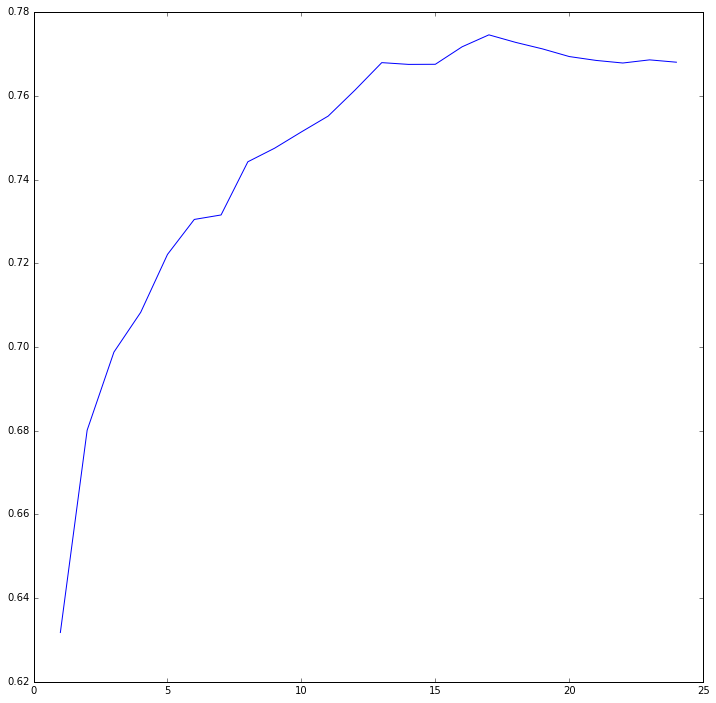

BEST k:  17
BEST AUC-ROC:  0.774587446805


In [237]:
mod_train = MakeCountersWithFolding(X_train, y_train)
mod_test = MakeCounters(X_test, X_train, y_train)

k_list = np.arange(1, 25)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree").fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])
    
plt.plot(k_list, auc_roc)
plt.show()

print("BEST k: ", k_list[np.argmax(auc_roc)])
print("BEST AUC-ROC: ", np.max(auc_roc))

Странный результат (с фолдингом хуже, чем без него). Это слегка противоречит условию задания, но мне кажется разумным здесь как-нибудь нормировать счётчики counts и successes.

In [238]:
def MakeCountersAndNormalize(train, extractable_data, extractable_data_ans):
    train_modified = pd.DataFrame(index=train.index)
    
    for feature in train.columns:
        vc = extractable_data[feature].value_counts()
        vc_t = (extractable_data[feature] * extractable_data_ans).value_counts()
        
        train_modified[feature + "_counts"] = pd.Series([vc.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_successes"] = pd.Series([vc_t.get(x, 0) for x in train[feature]], index=train.index)
        train_modified[feature + "_cs"] = (train_modified[feature + "_successes"] + 1) / (train_modified[feature + "_counts"] + 2)
        
        # "нормируем"
        train_modified[feature + "_counts"] /= len(extractable_data)
        train_modified[feature + "_successes"] /= len(extractable_data)
        
    return train_modified

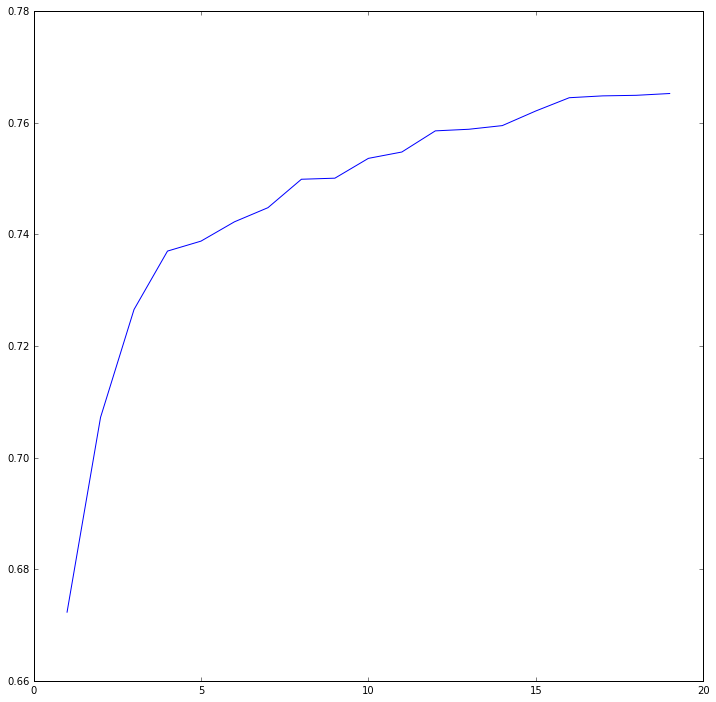

BEST k:  19
BEST AUC-ROC:  0.765248431535


In [234]:
mod_train = MakeCountersAndNormalize(X_train, X_train, y_train)
mod_test = MakeCountersAndNormalize(X_test, X_train, y_train)

k_list = np.arange(1, 20)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree").fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])
    
plt.plot(k_list, auc_roc)
plt.show()

print("BEST k: ", k_list[np.argmax(auc_roc)])
print("BEST AUC-ROC: ", np.max(auc_roc))

In [235]:
def MakeCountersWithFoldingAndNormalize(X_train, y_train):
    L = len(X_train)
    mt1 = MakeCountersAndNormalize(X_train[:L//3], X_train[L//3:], y_train[L//3:])
    indexes = np.append(np.arange(0, L//3), np.arange(2*L//3, L))
    mt2 = MakeCountersAndNormalize(X_train[L//3:2*L//3], X_train.iloc[indexes], y_train.iloc[indexes])
    mt3 = MakeCountersAndNormalize(X_train[2*L//3:], X_train[:2*L//3], y_train[:2*L//3])
    return pd.concat([mt1, mt2, mt3])

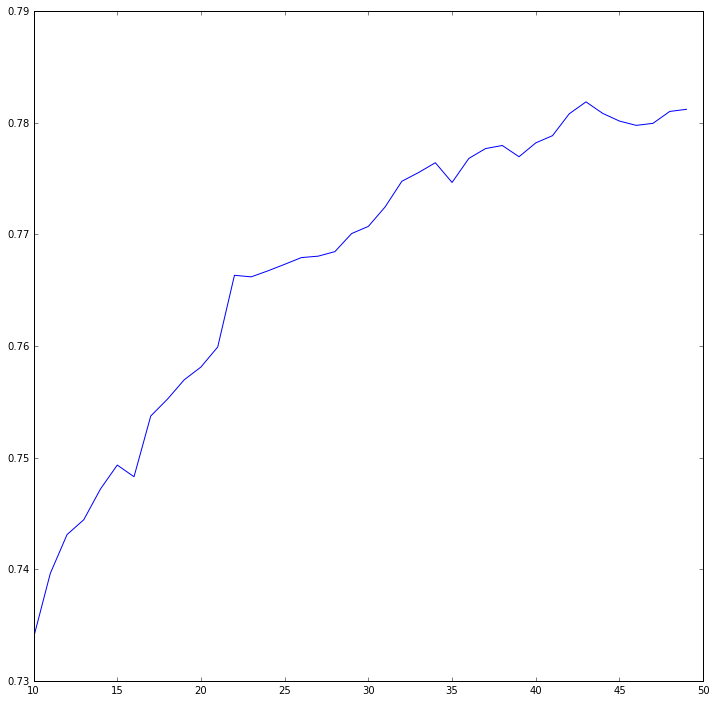

BEST k:  43
BEST AUC-ROC:  0.781874647975


In [243]:
mod_train = MakeCountersWithFoldingAndNormalize(X_train, y_train)
mod_test = MakeCountersAndNormalize(X_test, X_train, y_train)

k_list = np.arange(10, 50)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree").fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])
    
plt.plot(k_list, auc_roc)
plt.show()

print("BEST k: ", k_list[np.argmax(auc_roc)])
print("BEST AUC-ROC: ", np.max(auc_roc))

Интересно! Вообще, до подобной "нормировки" признаки cs, т.е. сглаженное отношение counts на successes, не имели почти никакого влияния на результат, а после - те признаки, которые дают мало информации (где разных значений много, и нет доминирующих, т.е. чаще встречающихся) стали принимать очень маленькие значения (< 0.1), когда сглаженное отношение близко к 1. Соответственно, после нормировки основное влияние на результат дают именно эти признаки. Почему результат получился примерно таким же - непонятно, ещё интересно, почему без фолдинга работает лучше, чем с ним (в первом случае, без нормировки) - тестирование-то проводится на независимой выборке, если б мы переобучились, такого бы не было. Возможно, здесь мы почему-то не переобучаемся? Ещё интересно, почему так взлетело оптимальное k, стоило только "переключиться" на сглаженное отношение counts и successes

#### 4. Добавьте в исходную выборку парные признаки — то есть для каждой пары $(f_i, f_j)$, $i < j$ исходных категориальных признаков добавьте новый категориальный признак $f_{ij}$, значение которого является конкатенацией значений $f_i$ и $f_j$ (желательно через какой-нибудь специальный символ во избежание коллизий). Посчитайте счетчики для этой выборки, найдите качество метода $k$ ближайших соседей с наилучшим $k$ (с фолдингом и без).

In [16]:
def MakePairFeatures(train):
    train_modified = train.copy()
    
    for i, feature1 in enumerate(train.columns):
        for feature2 in train.columns[i+1:]:
            train_modified[feature1 + "+" + feature2] = train[feature1].astype(str) + "#" + train[feature2].astype(str)
    
    return train_modified

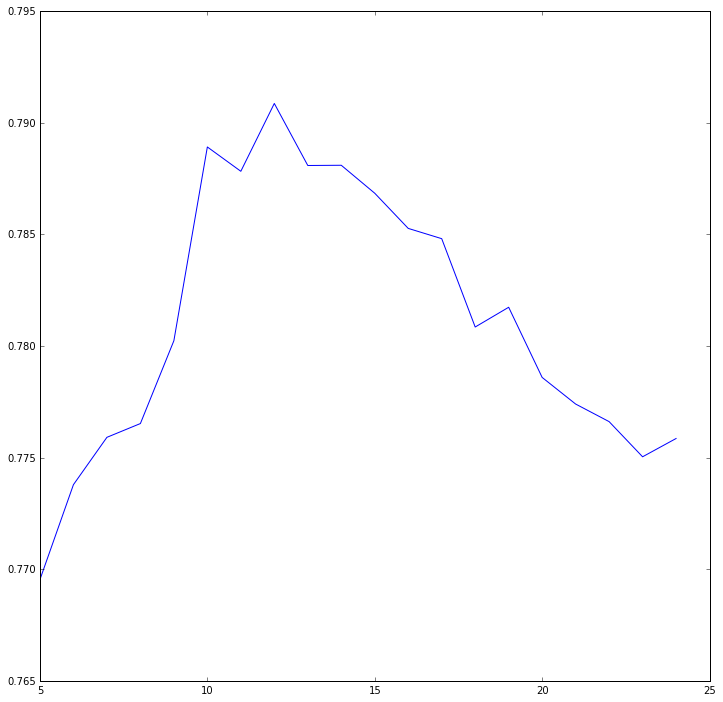

BEST k:  12
BEST AUC-ROC:  0.790866723512


In [250]:
train, test = MakePairFeatures(X_train), MakePairFeatures(X_test)
mod_train = MakeCounters(train, train, y_train)
mod_test = MakeCounters(test, train, y_train)

k_list = np.arange(5, 25)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs = -1).fit(mod_train, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test)[:, 1])
    
plt.plot(k_list, auc_roc)
plt.show()

print("BEST k: ", k_list[np.argmax(auc_roc)])
print("BEST AUC-ROC: ", np.max(auc_roc))

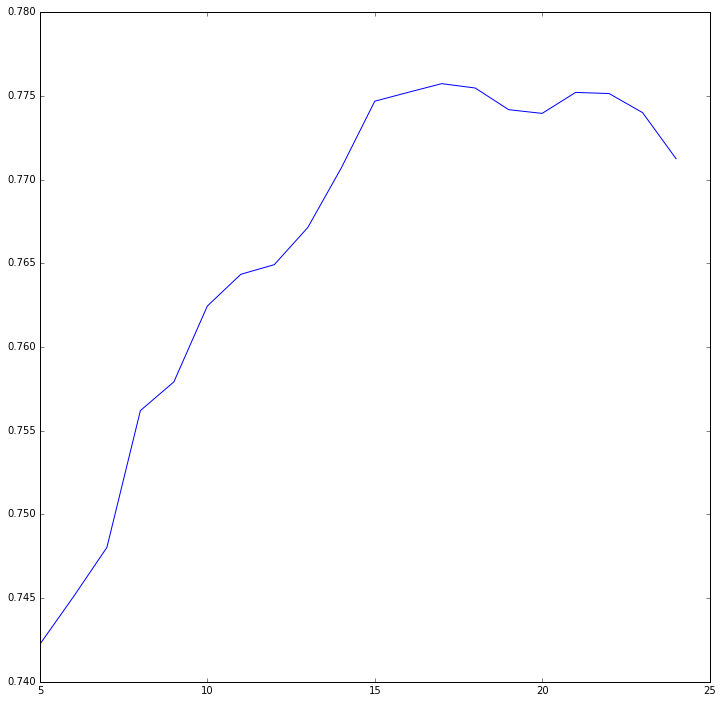

BEST k:  17
BEST AUC-ROC:  0.775731722104


In [249]:
train, test = MakePairFeatures(X_train), MakePairFeatures(X_test)
mod_train_wf = MakeCountersWithFolding(train, y_train)
mod_test_wf = MakeCounters(test, train, y_train)

k_list = np.arange(5, 25)
auc_roc = np.empty(k_list.shape)
for i, k in enumerate(k_list):
    Classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, algorithm="kd_tree", n_jobs = -1).fit(mod_train_wf, y_train)
    auc_roc[i] = sklearn.metrics.roc_auc_score(y_test, Classifier.predict_proba(mod_test_wf)[:, 1])
    
plt.plot(k_list, auc_roc)
plt.show()

print("BEST k: ", k_list[np.argmax(auc_roc)])
print("BEST AUC-ROC: ", np.max(auc_roc))

Забавно, что при росте k качество без фолдинга начало падать. Возможно, сказывается проклятье размерности? (с фолдингом тоже с k=23 началось какое-то падение!). Тем не менее, без фолдинга на оптимальном k качество наилучшее из всех алгоритмов в этом задании - хотя, казалось бы, отсутствие фолдинга это плохо. Возможно, большое количество признаков гасит переобучение от отсутствия целевой переменной?

## Часть 3: Решающие деревья и леса

#### 1. Возьмите из предыдущей части выборку с парными признаками, преобразованную с помощью счетчиков без фолдинга. Настройте решающее дерево, подобрав оптимальные значения параметров `max_depth` и `min_samples_leaf`. Какой наилучший AUC-ROC на контроле удалось получить?

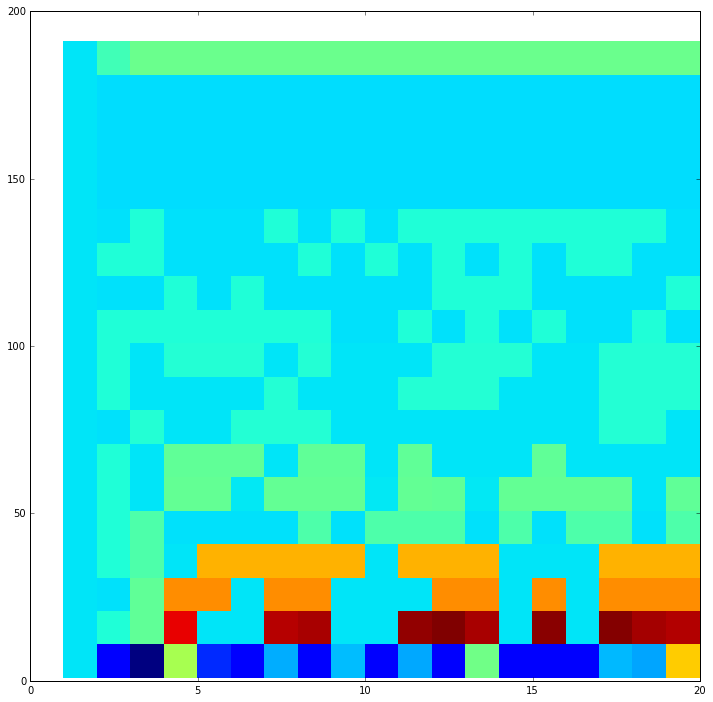

In [252]:
depth = np.arange(1, 21)
samples_leaf = np.arange(1, 200, 10).astype(int)

xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.empty(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):
        clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
        clf = clf.fit(mod_train, y_train)
        zgrid[sl][d] = sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        
plt.pcolor(xgrid, ygrid, zgrid)
plt.show()

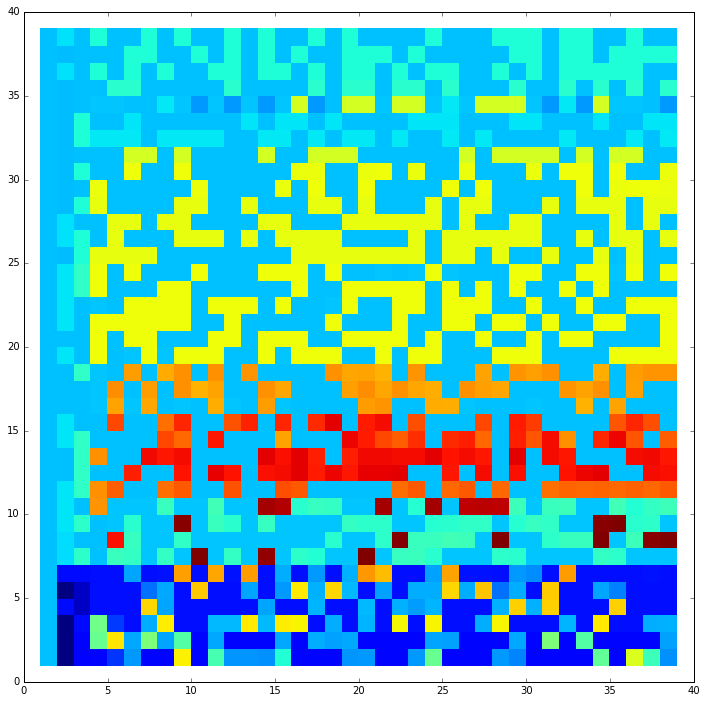

In [253]:
depth = np.arange(1, 40)
samples_leaf = np.arange(1, 40).astype(int)

xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.empty(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):
        clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
        clf = clf.fit(mod_train, y_train)
        zgrid[sl][d] = sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        
plt.pcolor(xgrid, ygrid, zgrid)
plt.show()

In [254]:
zgrid.max()

0.76110969866700051

In [296]:
clf = tree.DecisionTreeClassifier(max_depth=39, min_samples_leaf=7)
clf = clf.fit(mod_train, y_train)
print("best AUC_ROC: ", sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1]))

best AUC_ROC:  0.759627675386


Но это не совсем правда! Карта выше чуть-чуть неверна, поскольку алгоритм построения дерева недетерминирован. Усредним по нескольким экспериментам:

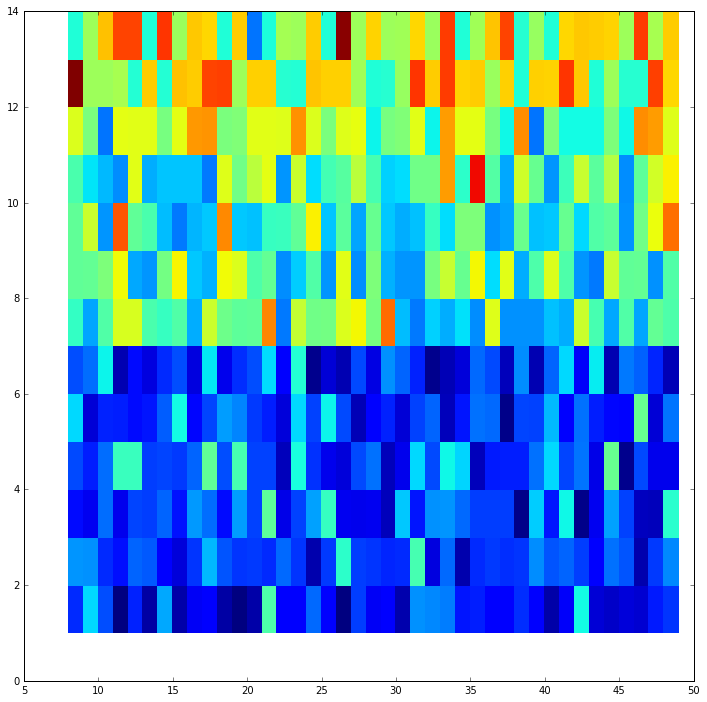

In [297]:
depth = np.arange(8, 50)
samples_leaf = np.arange(1, 15).astype(int)

xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.zeros(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):
        # усреднение
        for test_k in range(5):
            clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
            clf = clf.fit(mod_train, y_train)
            zgrid[sl][d] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        zgrid[sl][d] /= 5
        
plt.pcolor(xgrid, ygrid, zgrid)
plt.show()

In [298]:
zgrid.max()

0.73481133440766011

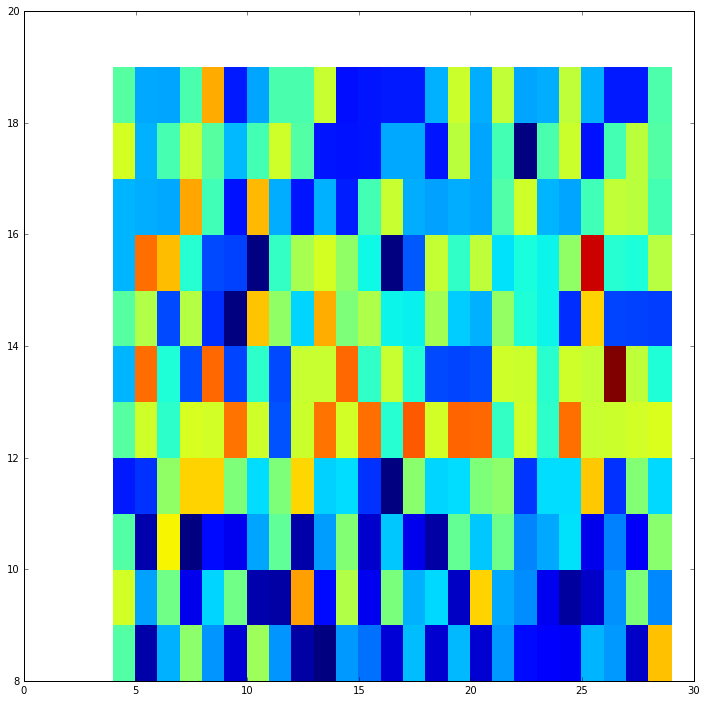

In [350]:
depth = np.arange(4, 30)
samples_leaf = np.arange(8, 20).astype(int)

xgrid, ygrid = np.meshgrid(depth, samples_leaf)
zgrid = np.zeros(xgrid.shape)
for sl in range(len(samples_leaf)):
    for d in range(len(depth)):
        for test_k in range(5):
            clf = tree.DecisionTreeClassifier(max_depth=depth[d], min_samples_leaf=samples_leaf[sl])
            clf = clf.fit(mod_train, y_train)
            zgrid[sl][d] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        zgrid[sl][d] /= 5
        
plt.pcolor(xgrid, ygrid, zgrid)
plt.show()

In [351]:
zgrid.max()

0.73408080527567443

In [363]:
clf = tree.DecisionTreeClassifier(max_depth=26, min_samples_leaf=13)
clf = clf.fit(mod_train, y_train)
print(sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1]))

0.734616821297


Более честное значение, хотя при запуске с некоторой вероятностью падает аж до 0.58. Странное влияние недетерминированности построения дерева на точность угадывания. Метрики, кстати, всё ещё лучше работают.

#### 2. Настройте случайный лес, подобрав такое число деревьев `n_estimators`, при котором ошибка выходит на асимптоту. Какое качество на тестовой выборке он дает?

In [18]:
n_set = np.arange(1, 20)
results = np.zeros(n_set.shape[0])
overfitting = np.zeros(n_set.shape[0]) # насколько точно предсказываем обучающую выборку - тут интересный момент
for i, n in enumerate(n_set):
    for k in range(5):
        clf = ensemble.RandomForestClassifier(n_estimators = n, max_depth=5, min_samples_leaf=20, n_jobs = -1)
        clf = clf.fit(mod_train, y_train)
        
        results[i] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test)[:, 1])
        overfitting[i] += sklearn.metrics.roc_auc_score(y_train, clf.predict_proba(mod_train)[:, 1])
    
    results[i] /= 5
    overfitting[i] /= 5

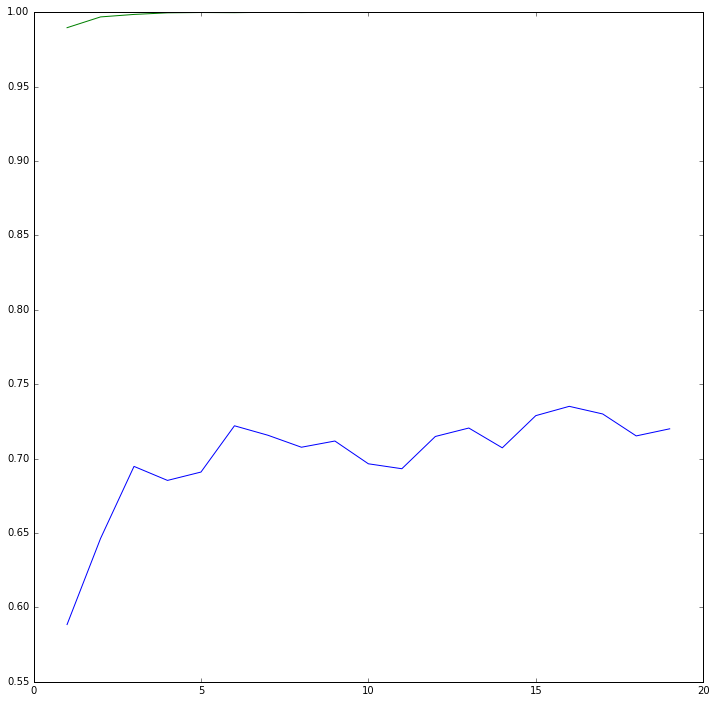

In [19]:
plt.plot(n_set, results)
plt.plot(n_set, overfitting)
plt.show()

In [20]:
print("BEST: ", results.max())

BEST:  0.735123893078


Адкое переобучение! И так снизил max_depth и min_samples_leaf, но за точность для одного дерева особо уйти не получается. AUC-ROC на обучающей выборке стабильно 1.0, и с этим ничего не получается сделать. Так что это малоправдодобный результат.

#### 3. Возьмите выборку с парными признаками, для которой счетчики посчитаны с фолдингом. Обучите на ней случайный лес, подобрав число деревьев. Какое качество на тестовой выборке он дает? Чем вы можете объяснить изменение результата по сравнению с предыдущим пунктом?

In [339]:
n_set = np.arange(1, 20)
results = np.zeros(n_set.shape[0])
overfitting = np.zeros(n_set.shape[0])
for i, n in enumerate(n_set):
    for k in range(5):
        clf = ensemble.RandomForestClassifier(n_estimators = n, max_depth=5, min_samples_leaf=20, n_jobs = -1)
        clf = clf.fit(mod_train_wf, y_train)
        
        results[i] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test_wf)[:, 1])
        overfitting[i] += sklearn.metrics.roc_auc_score(y_train, clf.predict_proba(mod_train_wf)[:, 1])
    
    results[i] /= 5
    overfitting[i] /= 5

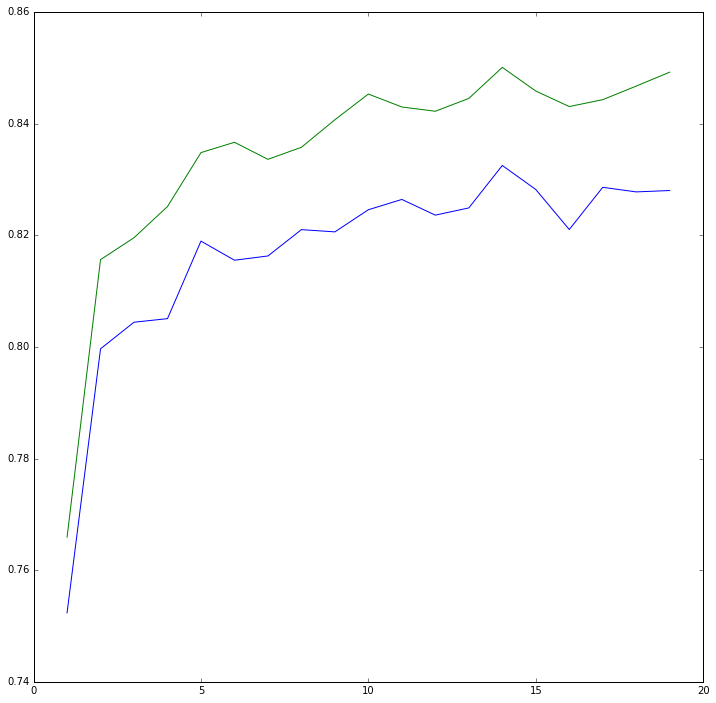

In [340]:
plt.plot(n_set, results)
plt.plot(n_set, overfitting)
plt.show()

Уже правдоподобнее! Но в случае с отсутствующим фолдингом были страдания от переобучения, что привело к желанию уменьшить depth и увеличить min_samples_leaf. Вернём к более оптимальным значениям с точки зрения одного дерева:

In [341]:
n_set = np.arange(1, 20)
results = np.zeros(n_set.shape[0])
overfitting = np.zeros(n_set.shape[0])
for i, n in enumerate(n_set):
    for k in range(5):
        clf = ensemble.RandomForestClassifier(n_estimators = n, max_depth=8, min_samples_leaf=15, n_jobs = -1)
        clf = clf.fit(mod_train_wf, y_train)
        
        results[i] += sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test_wf)[:, 1])
        overfitting[i] += sklearn.metrics.roc_auc_score(y_train, clf.predict_proba(mod_train_wf)[:, 1])
    
    results[i] /= 5
    overfitting[i] /= 5

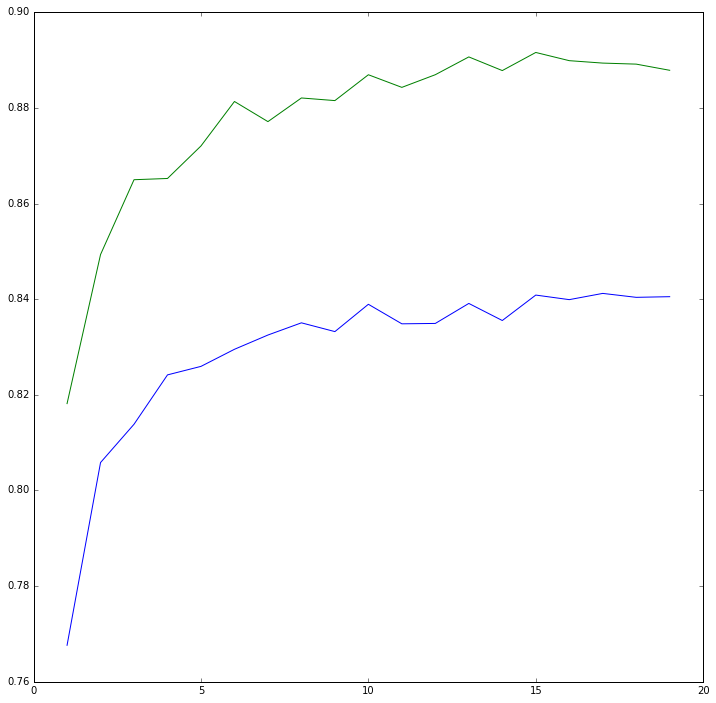

In [342]:
plt.plot(n_set, results)
plt.plot(n_set, overfitting)
plt.show()

In [344]:
print(results.max())

0.841206231616


Видимо, наконец-то начало явно сказываться закладывание целевой переменной в признаки, о чём деревья, видимо, быстро просекают. Очень сложно без фолдинга подобрать такие параметры деревьев, чтобы они не давали стопроцентный результат на обучающей выборке, а на графиках отлично видно, что стоит только включить фолдинг, и зелёная линия спадает с плотной единички почти до результатов на контроле.

In [349]:
clf = ensemble.RandomForestClassifier(n_estimators = 16, max_depth=8, min_samples_leaf=15, n_jobs = -1)
clf = clf.fit(mod_train_wf, y_train)
print("FINAL RESULT: ", sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(mod_test_wf)[:, 1]))

FINAL RESULT:  0.847968916234


Здесь вы можете поделиться своими мыслями о задании.

Лабораторных нужно больше. Очень желательно как-то скооперироваться с курсом "практикума на эвм", в котором с одной стороны больший упор на то, как алгоритмы устроены внутри и технику программирования, а с другой - мало реальных навыков их применения и настройки. 

Особо печалит, что на практикуме не было пандаса. Тех кратких обзоров работы с пандой и сайкитом на семинарах было как-то мало, чтобы нормально выполнять это задание - чат группы изобилует фразами "нас кинули в воду, а как плавать - читайте документацию", при этом задание само, казалось бы, базовое. Хотя с моего пня кажется, что в 2.1 - 2.2 всё-таки что-то не так с рассчётом вычислительной способности компьютеров студентов, ноутбук у меня ещё на 1.6 подох, а тут - по два часа (возможно, есть более эффективные способы решения? Но существенно ли они сократят время выполнения? Да, полагаю, по жизни придётся столкнуться с долгими вычислениями, но в учебном задании с дедлайном несколько часов - это не комильфо).

И вообще лучше сентябрь никаким ммро не заниматься, а вдолбить всем студентам питон, пандас и так далее чтоб у них мозги на место встали, а потом уже лекции по кнн-ам вместе с практическими заданиями и семинарами. Не вписывается в формат расписания учебных частей? ну может как-то тихонечко, чтобы она не заметила... Потому что сейчас приходилось по сто часов искать нужные функции в пандасе на каждое элементарное действие, больше времени уходит не на содержательные размышления, а на "ааа, питооон!". Потому что полгруппы питон не знало до старта.

А здесь вставьте смешную картинку.

![Смешная картинка](Смешная картинка.jpg)

А здесь посоветуйте преподавателям хороший фильм или сериал.

![SteinsGate](SteinsGate.jpg)
Первые несколько серий вообще ничего не понятно, но в этом вся соль.